## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import re
import string
import operator
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")
import tokenization
from wordcloud import STOPWORDS

In [2]:
train = pd.read_csv("../input/explore_train.csv")
test = pd.read_csv("../input/explore_test.csv")

In [3]:
train.head()

,keyword,text,target
0,no_keyword,Our Deeds are the Reason of this #earthquake M...,1
1,no_keyword,Forest fire near La Ronge Sask. Canada,1
2,no_keyword,All residents asked to 'shelter in place' are ...,1
3,no_keyword,"13,000 people receive #wildfires evacuation or...",1
4,no_keyword,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
disaster_tweets = train.query("target == 1")
generic_tweets = train.query("target == 0")

In [12]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in generic_tweets['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in generic_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in generic_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

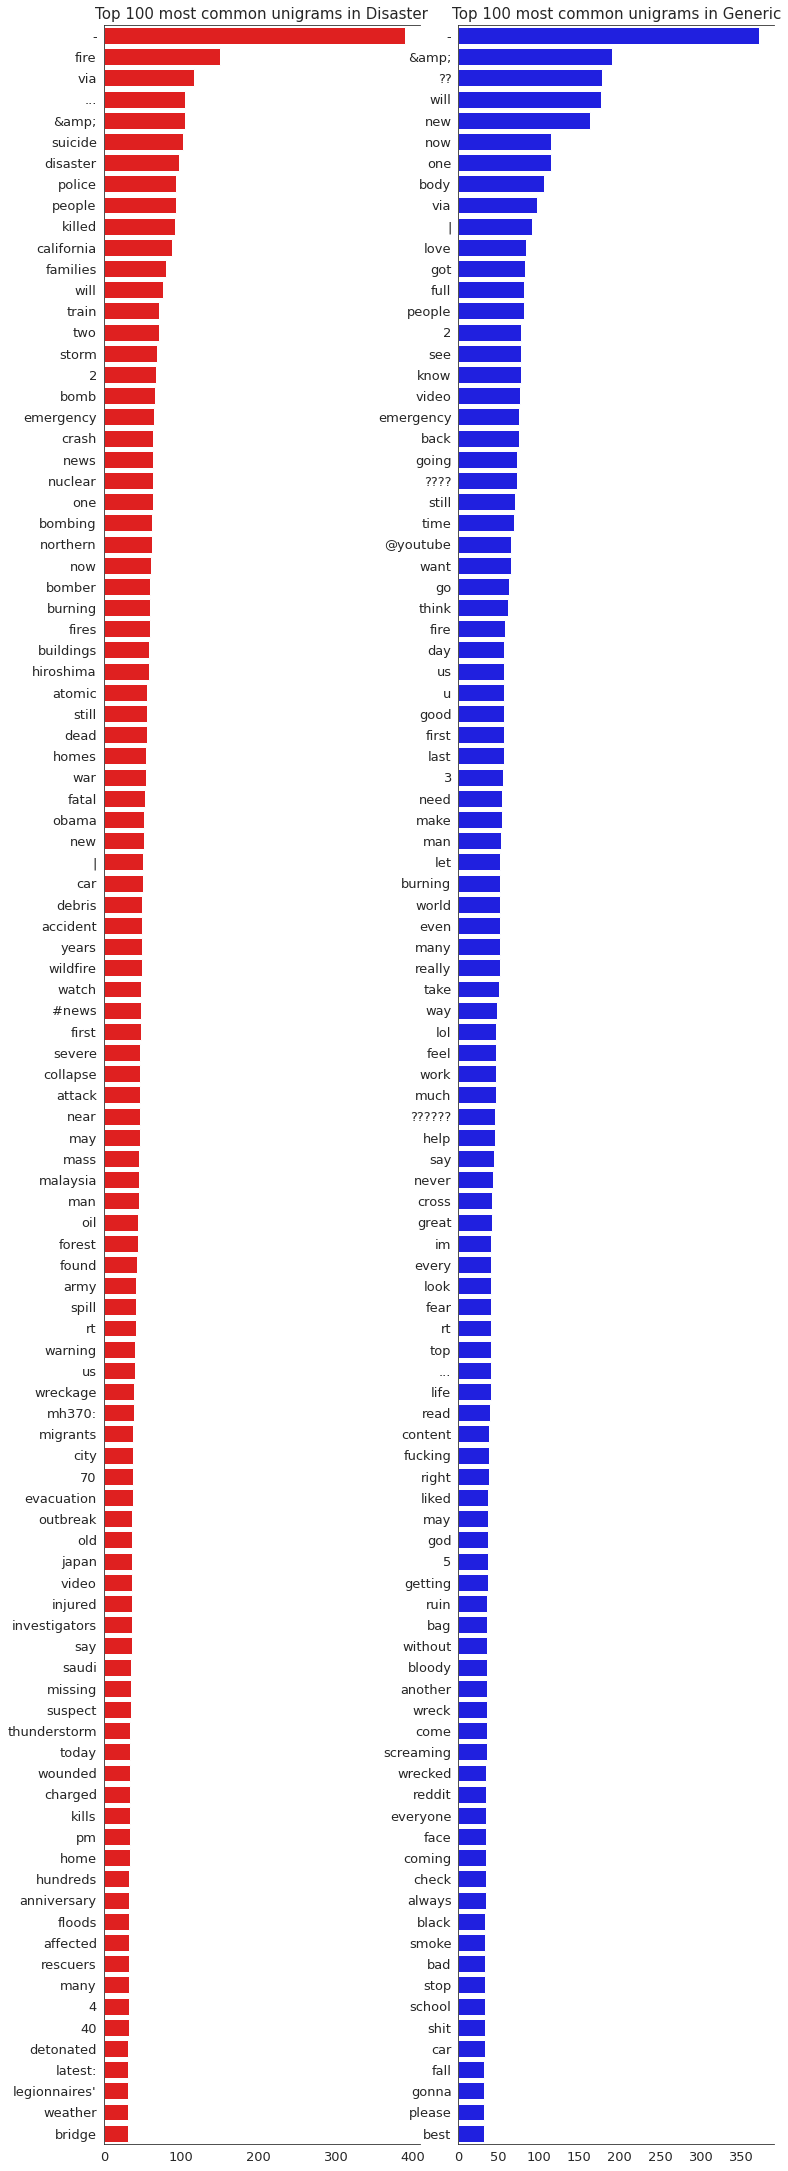

In [23]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 30))
    plt.tight_layout()

    sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
    sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='blue')

    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

    axes[0].set_title(f'Top {N} most common unigrams in Disaster', fontsize=15)
    axes[1].set_title(f'Top {N} most common unigrams in Generic', fontsize=15)


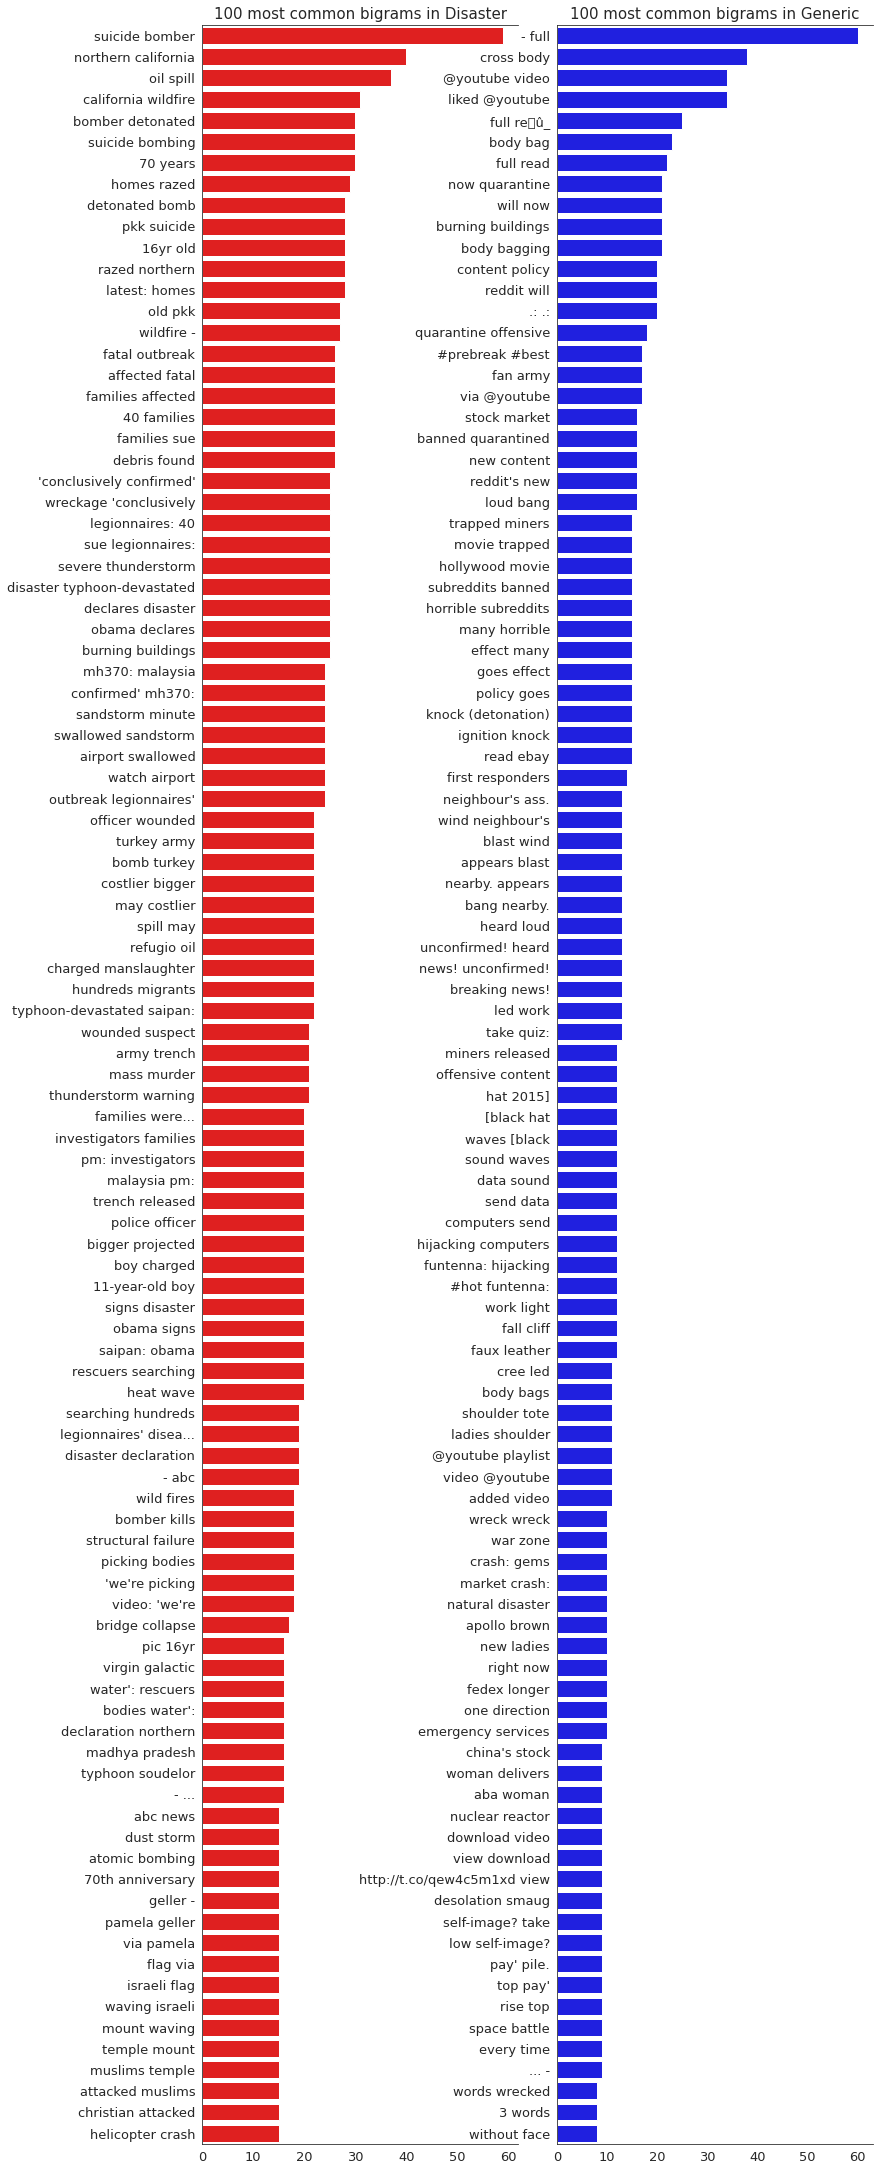

In [27]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 30))
    plt.tight_layout()

    sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
    sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='blue')

    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

    axes[0].set_title(f'{N} most common bigrams in Disaster', fontsize=15)
    axes[1].set_title(f'{N} most common bigrams in Generic', fontsize=15)

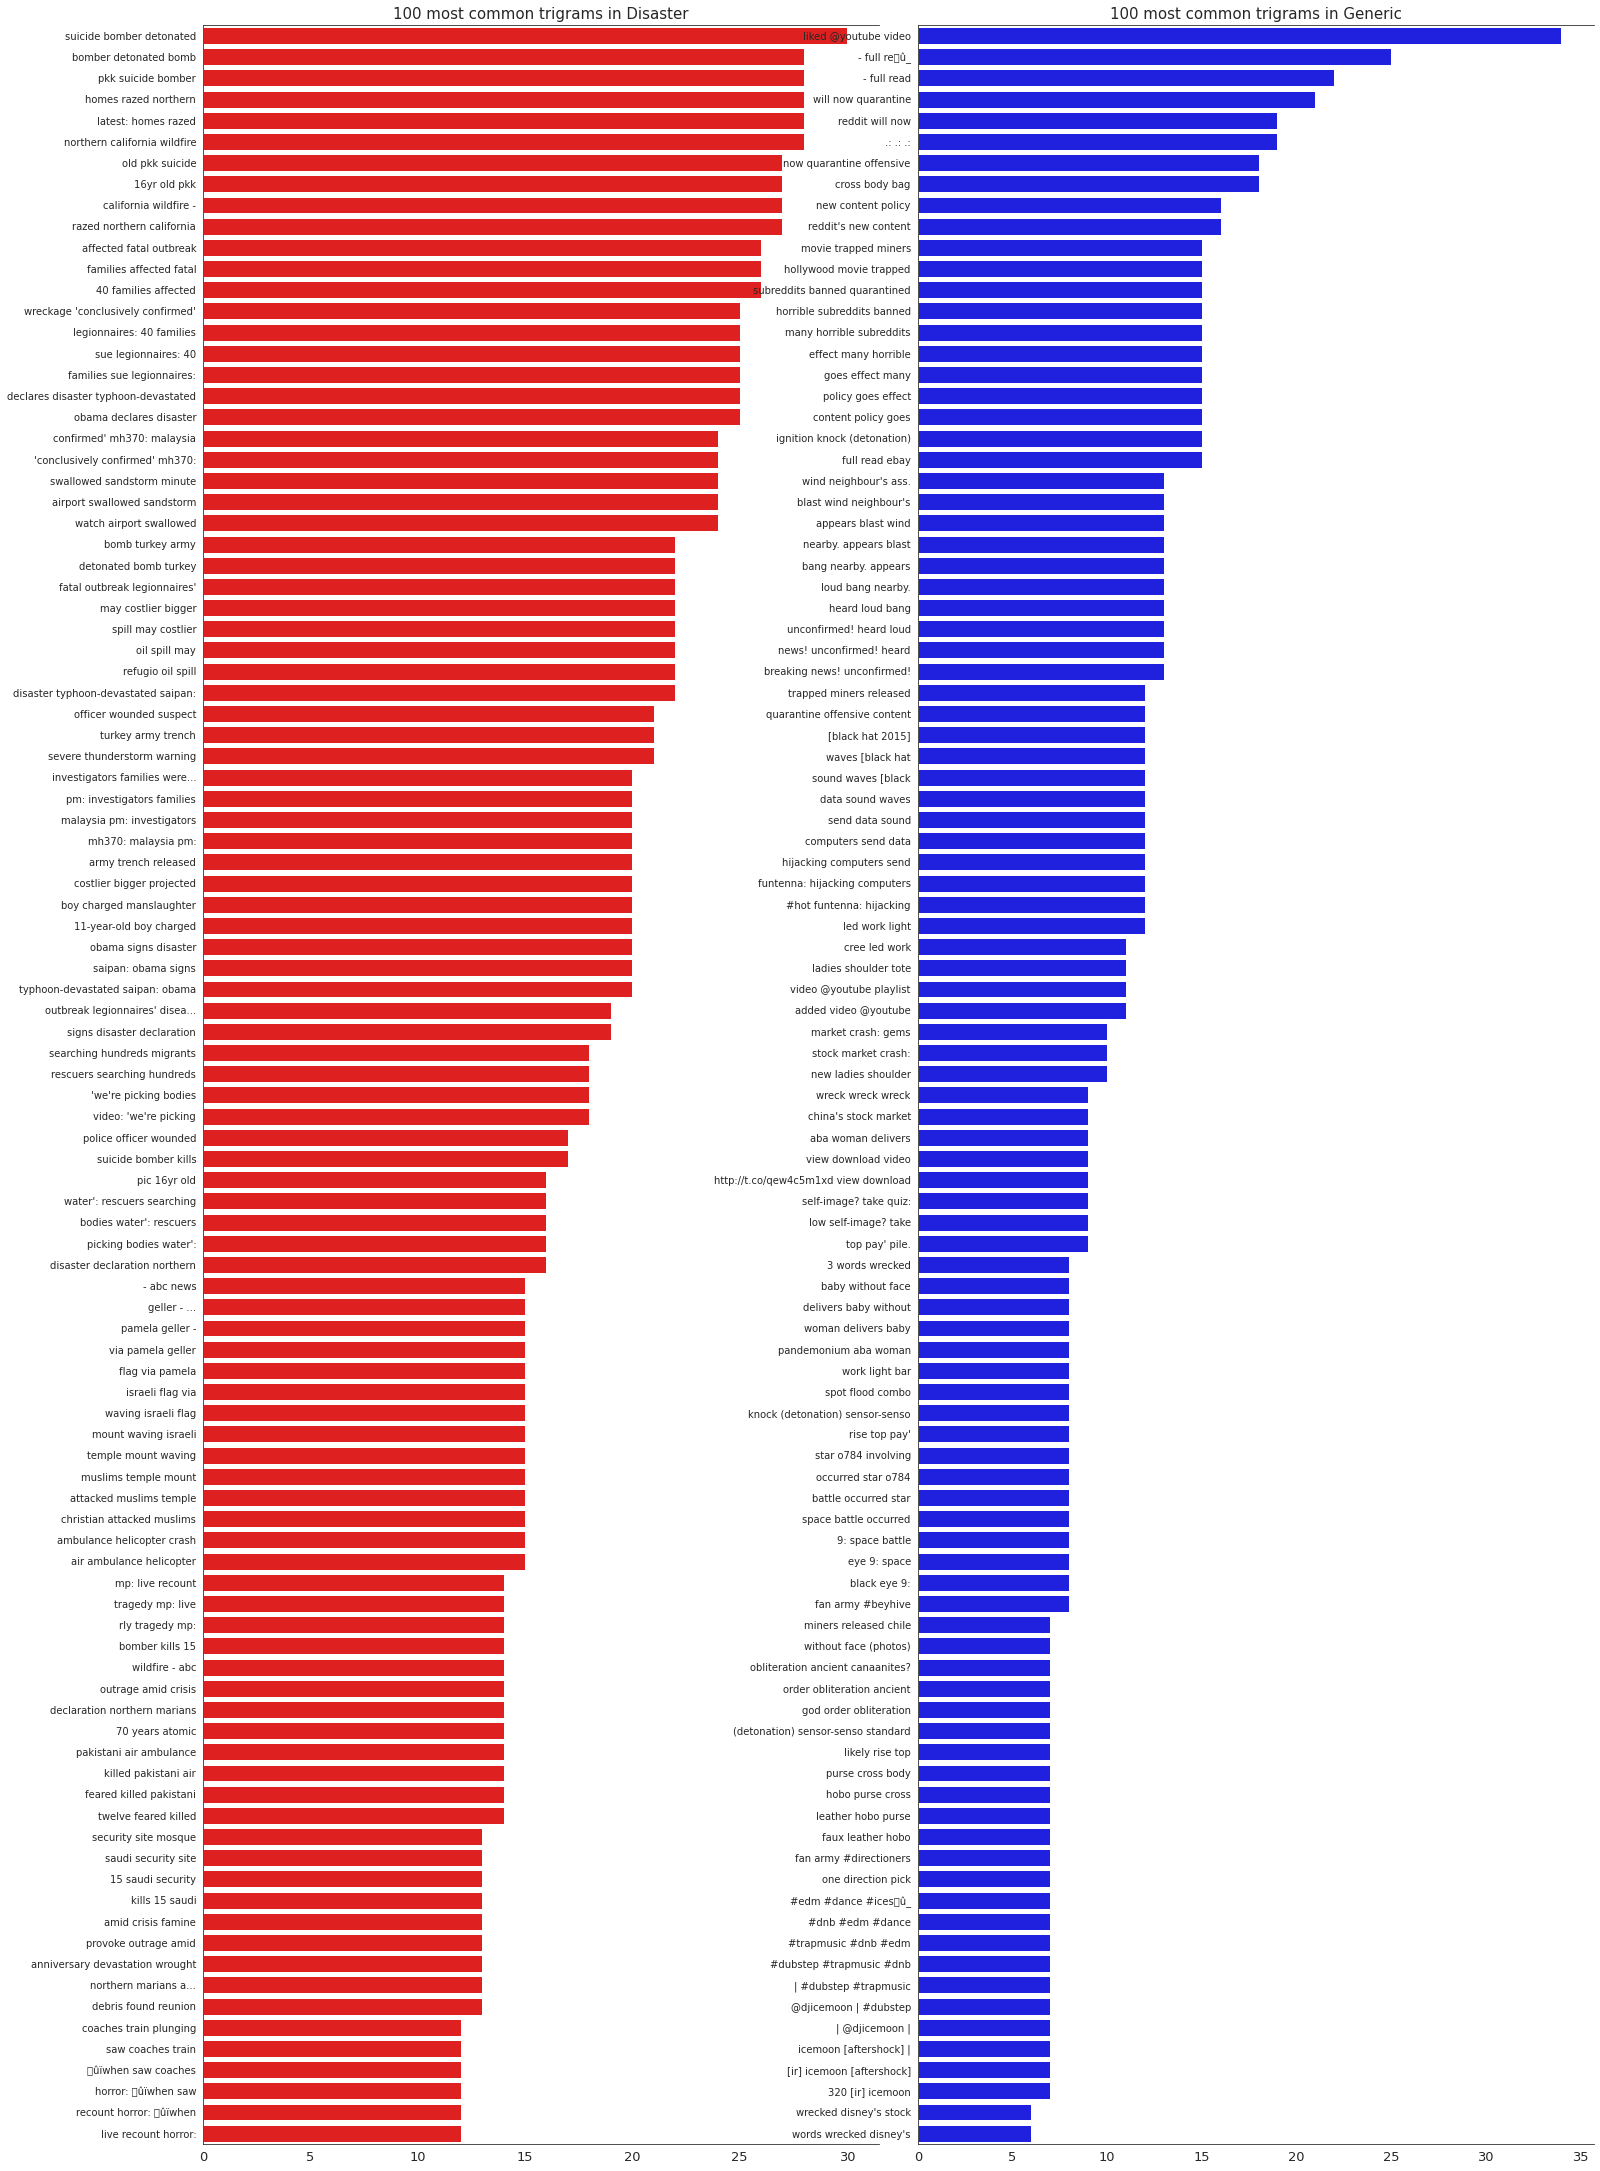

In [31]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(ncols=2, figsize=(20, 30))
    plt.tight_layout()

    sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
    sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='blue')

    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=10)

    axes[0].set_title(f'{N} most common trigrams in Disaster', fontsize=15)
    axes[1].set_title(f'{N} most common trigrams in Generic', fontsize=15)